## An Introduction to Wave Packets

In [32]:
# setup 
import numpy as np
import sympy as sp
sp.init_printing(use_latex='mathjax')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 20)  # (width, height)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 16
from matplotlib import patches

#get_ipython().magic('matplotlib')  # separate window
get_ipython().magic('matplotlib inline') # inline plotting

### Fourier Series
A Fourier Series is a set of waves that are added together to form a wave packet. When we talk about matter waves, the matter particle may be localized in space as described by a Fourier Series. If a set of waves with varying wavenumber $k=\frac{2\pi}{\lambda}$ are added together the localization in space is due to the distribution of wavenumbers in the series. The broader the distribution of wavenumbers, the more certain we are about the position of the particle because the wavenumber is directly related to the momentum. A wide distribution of wavenumbers means a large uncertainty in the momentum, i.e. we do not have one precise value of momentum.

$$\begin{align}
\Delta p\Delta x \ge \frac{\hbar}{2\pi}\\
\\
\hbar\Delta k\Delta x \ge \frac{\hbar}{2\pi}\\
\\
\Delta k\Delta x \ge \frac{1}{2\pi}
\end{align}$$

### Create a Gaussian distribution for the wavenumbers
Let's look at a Gaussian wave packet. Make a Gaussian Distribution of wavenumbers (k)

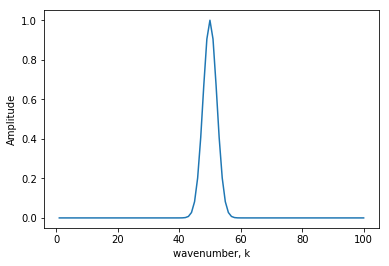

In [2]:
spacing = 1
width = 10
karr = np.arange(1, 101, spacing) # wavenumbers go from 1 to 100
Ak = np.exp(-(karr-50)**2/width) # a gaussian centered at k = 50
plt.plot(karr, Ak)
plt.xlabel('wavenumber, k')
plt.ylabel('Amplitude')
plt.show()

### Create the Fourier Series
Now let's create the sine waves that will eventually be added together. We will store them in a 2D array such that the rows correspond to a sine wave for a given $k$ and $A(k)$. This example creates 100 sine waves that are distributed in amplitude and wavenumber according to the Gaussian distribution above.

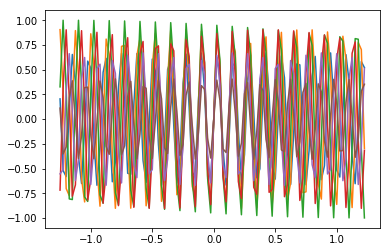

In [3]:
x = np.arange(-1.25, 1.25, 0.025) # The x values for our sine waves.
kx = np.ones((100,100)) # Create a matrix for kx values to simplify calculations later.
kx = kx[:,0:100]*x # Fill the kx matrix with x values along the rows.
kx = kx[0:100, :].T*karr # Multiply each column by its appropriate k value.

Ax = np.zeros((100,100)) # Create a matrix for the sine waves.
Ax[:,0:100]=Ak*np.sin(kx) # Fill the matrix with the appropriate sine waves.
plt.plot(x,Ax[:,47:53]) # Plot a few of the waves to check that they look right (see Fig. 6.13 in Taylor, Zafiratos, Dubson).

Now, let's do some matrix math to sum up the sine waves. 

Text(0,0.5,'Amplitude')

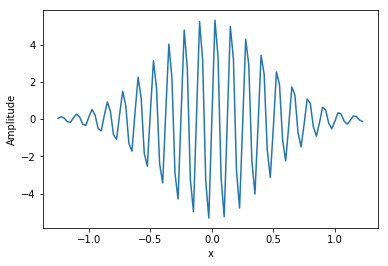

In [4]:
ones = np.ones(100)
wave = np.matmul(Ax, ones) 
plt.plot(x, wave)
plt.xlabel('x')
plt.ylabel('Amplitude')

### Square Waves
Now, let's see how we can create a square wave train by summing sine waves. In this case, the amplitudes and wavenumbers have a different form. The amplitudes are defined as

$$A_n = \frac{2}{\pi n} \sin\left(\frac{\pi a n}{\lambda}\right)$$

This means the amplitude decreases hyperbolically with the term and fluctuates according to the sine function in the series. The ratio of $\frac{a}{\lambda} determines the pulse width to wavelength. We'll make the full series according to

$$\begin{align}
f\left(x\right)=\sum_{n=0}^{\infty} A_n \cos\left(\frac{2\pi n}{\lambda}x\right)\\
\\
f\left(x\right)=\sum_{n=0}^{\infty} A_n \cos\left(k_n x\right)
\end{align}$$

We will make this series by creating a few 2-dimensional arrays. The first array will store $A_n$.

400


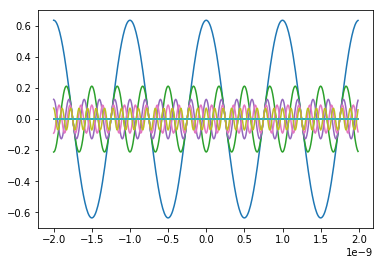

In [94]:
lam = 1e-9 # wavelength
kval = 2*np.pi/lam # wavenumber can be changed by changing wavelength
numks = 10 # how many wavenumbers do you want in the sum?
aa = 0.5*lam # width of square wave as a fraction of wavelength
xsquare = np.arange(-2*lam, 2*lam, lam/100) # The x values for our sine waves.
arrlen = np.size(xsquare)
print(arrlen)
ksquare = np.arange(1, numks+1, 1) # wavenumbers go from 1 to something
nvals = np.arange(1, numks+1, 1)
ksquare = ksquare * kval
Ans = 2/np.pi/nvals * np.sin(np.pi*aa*nvals/lam)
fxarg = np.ones((numks,arrlen)) # Create a matrix for kx values to simplify calculations later.
fxarg = fxarg[:, 0:arrlen]*xsquare # Fill the kx matrix with x values along the rows.
fxarg = fxarg[0:arrlen, :].T*ksquare # Multiply each column by its appropriate k value.
fx = np.ones((numks,arrlen))
fx=Ans*np.cos(fxarg) # Fill the matrix with the appropriate cosine waves.
plt.plot(xsquare,fx[:, :]) # Plot a few of the waves to check that they look right (see Fig. 6.11 in Taylor, Zafiratos, Dubson).


Text(0,0.5,'Amplitude')

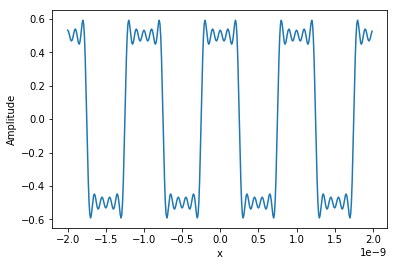

In [93]:
ones = np.ones(numks)
sqwv = np.matmul(fx, ones) 
plt.plot(xsquare, sqwv)
plt.xlabel('x')
plt.ylabel('Amplitude')

### Square Wave Widget

In [5]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(numks, aa):
    lam = 1e-9 # wavelength
    kval = 2*np.pi/lam # wavenumber can be changed by changing wavelength
    #numks = x
    #numks = 10 # how many wavenumbers do you want in the sum?
    aa = aa*lam/100 # width of square wave as a fraction of wavelength
    xsquare = np.arange(-2*lam, 2*lam, lam/100) # The x values for our sine waves.
    arrlen = np.size(xsquare)
    ksquare = np.arange(1, numks+1, 1) # wavenumbers go from 1 to something
    nvals = np.arange(1, numks+1, 1)
    ksquare = ksquare * kval
    Ans = 2/np.pi/nvals * np.sin(np.pi*aa*nvals/lam)
    fxarg = np.ones((numks,arrlen)) # Create a matrix for kx values to simplify calculations later.
    fxarg = fxarg[:, 0:arrlen]*xsquare # Fill the kx matrix with x values along the rows.
    fxarg = fxarg[0:arrlen, :].T*ksquare # Multiply each column by its appropriate k value.
    fx = np.ones((numks,arrlen))
    fx=Ans*np.cos(fxarg) # Fill the matrix with the appropriate cosine waves.
    
    ones = np.ones(numks)
    sqwv = np.matmul(fx, ones) 
    plt.figure(1)
    plt.subplot(211)
    plt.plot(xsquare,fx[:, :]) # Plot a few of the waves to check that they look right (see Fig. 6.11 in Taylor, Zafiratos, Dubson).
    plt.subplot(212)
    plt.plot(xsquare, sqwv)
    plt.xlabel('x')
    plt.ylabel('Amplitude')
    plt.show()
#    return 0

interact(f, numks=widgets.IntSlider(min=1,max=30,step=1,value=10), aa=widgets.IntSlider(min=5,max=95,step=5,value=5));

A Jupyter Widget

### Gaussian Wave Packet Widget

In [75]:
def packet(sigma):
    numks = 200
    spacing = 1
    ksarr = np.arange(1, numks+1, spacing) # wavenumbers go from 1 to numks
    Aks = np.exp(-(ksarr-numks/2)**2/sigma) # a gaussian centered 
    ksarr = ksarr * 1e5
    sigma = sigma * 1e5
    
    xs = np.arange(-1, 1, 2/numks) # The x values for our sine waves.
    xs = xs * 1e-5
    kxs = np.ones((numks,numks)) # Create a matrix for kx values to simplify calculations later.
    kxs = kxs[:,0:numks]*xs # Fill the kx matrix with x values along the rows.
    kxs = kxs[0:numks, :].T*ksarr # Multiply each column by its appropriate k value.
    arrlen = np.size(kxs)
    Axs = np.zeros((numks,numks)) # Create a matrix for the sine waves.
    Axs[:,0:numks]=Aks*np.sin(kxs) # Fill the matrix with the appropriate sine waves.
    onesies = np.ones(numks)
    waves = np.matmul(Axs, onesies) 
    
    plt.figure(1)
    plt.subplot(311)
    plt.plot(ksarr, Aks)
    plt.title('Wavenumber Distribution')
    plt.xlabel('k (1/m)')
    plt.ylabel('A(k)')
    plt.subplot(312)
    plt.plot(xs,Axs[:,:])
    plt.title('The individual waves in creating the packet')
    plt.xlabel('x (m)')
    plt.ylabel('Amplitude')
    plt.subplot(313)
    plt.plot(xs, waves)
    plt.title('The wave packet')
    plt.xlabel('x (m)')
    plt.ylabel('Amplitude')
    plt.rcParams.update({'font.size': 14})
    plt.rcParams.update({'legend.fontsize' : 18})
    plt.subplots_adjust(top=3, bottom=0.1, left=0.1, right=3.0, hspace=0.25,
                    wspace=0.1)
    plt.show()
    

interact(packet, sigma=widgets.IntSlider(min=5,max=500,step=5,value=100));

A Jupyter Widget